In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/')
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/cv_clustering')
sys.path.append('/Users/lee_jollans/Projects/clustering_pilot/may2020_evaluation/')
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pathlib
from scipy.cluster.hierarchy import dendrogram
from cv_clustering.mainfoldaggr import plot_dendrogram
from sklearn.manifold import TSNE
from cv_clustering.utils import colorscatter
from cv_clustering.beta_aggregate import vector_mse, get_proba, prob_from_data2
from sklearn.metrics import explained_variance_score, silhouette_score
import copy
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from numpy import savetxt
import statsmodels.api as sm
from statsmodels.formula.api import ols

sets = ["Tc", "Sc", "TSc", "Tc_tc", "Sc_sc", "TSc_tsc", "Tct_s", "Scs_s", "Tct_Scs_s", "Tct_tc_s", "Scs_sc_s", "Tct_Scs_tc_sc_s"]
setsize=np.array([82,82,150,84,84,154,82,82,150,84,84,154])
n_cv_folds = 4
n_k = 8

In [2]:
import csv
with open('/Users/lee_jollans/Projects/clustering_pilot/ALL/ALL_samples_idx.csv', newline='') as csvfile:
    sampleidx = list(csv.reader(csvfile))
tmpsampleidx = np.array([int(sampleidx[i][0]) for i in range(len(sampleidx))])
sampleidx = np.full([740], np.nan)
sampleidx[np.where(tmpsampleidx == 1)[0]] = 4
sampleidx[np.where(tmpsampleidx == 2)[0]] = 7
sampleidx[np.where(tmpsampleidx == 3)[0]] = 5
sampleidx[np.where(tmpsampleidx == 4)[0]] = 6
sampleidx[np.where(tmpsampleidx == 5)[0]] = 1
sampleidx[np.where(tmpsampleidx == 6)[0]] = 2
sampleidx[np.where(tmpsampleidx == 7)[0]] = 3
#(['ctrl', 'mdd', 'bp', 'ad', 'hunt', 'scz', 'mci'])

input_filedira = '/Users/lee_jollans/Projects/clustering_pilot/ALL/wspecsamp_'
modstra = '_mod_'

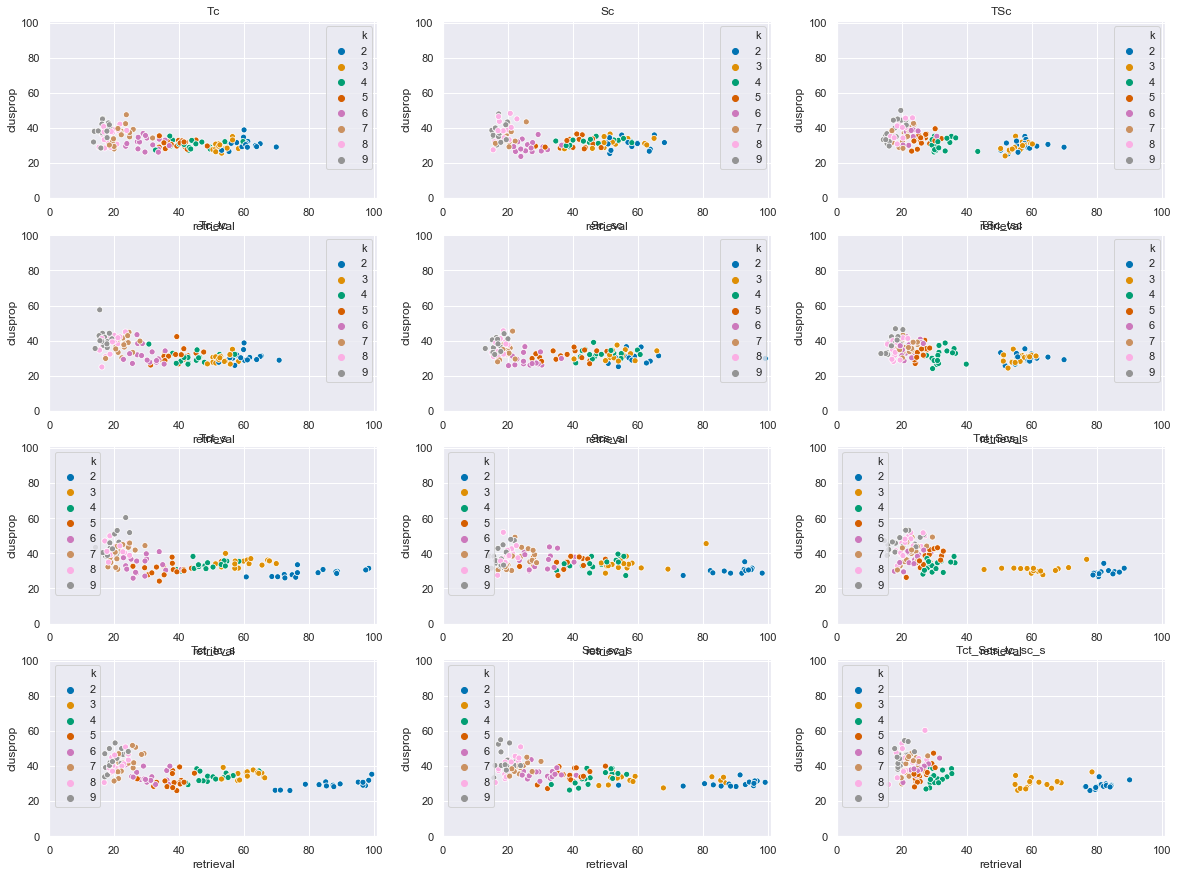

In [77]:
sns.set()
fig=plt.figure(figsize=[20,15])

for s in range(12):
    df=pd.DataFrame()
    for mf in range(4):
        for sf in range(4):
            filestr=(input_filedira + sets[s] + modstra + str((mf*4)+sf))
            with open(filestr, "rb") as f:
                mod = pickle.load(f)
            y=mod.cluster_ensembles_labels
            findHUNT=np.where(sampleidx[mod.train_index_sub]==1)[0]
            for k in range(8):
                cf=np.array([len(np.where(y[:,k]==i)[0]) for i in range(k+2)])

                hf=np.array([len(np.where(y[findHUNT,k]==i)[0]) for i in range(k+2)])
                huntfindmax[s,mf,sf,k]=(np.max(hf)*100)/len(findHUNT)
                huntclussize[s,mf,sf,k]=(np.max(hf)*100)/cf[np.where(hf==np.max(hf))[0][0]]
                
                tmp_df = pd.DataFrame({'retrieval': [huntfindmax[s,mf,sf,k]],
                                       'clusprop': [huntclussize[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)  
                
    plt.subplot(4,3,s+1)
    sns.scatterplot(x='retrieval', y='clusprop', hue='k', data=df, palette='colorblind')
    #sns.kdeplot(huntfindmax[s,:,:,7].flatten(), huntclussize[s,:,:,7].flatten())
    plt.xlim(0,101)
    plt.ylim(0,101)
    plt.title(sets[s])
plt.show()

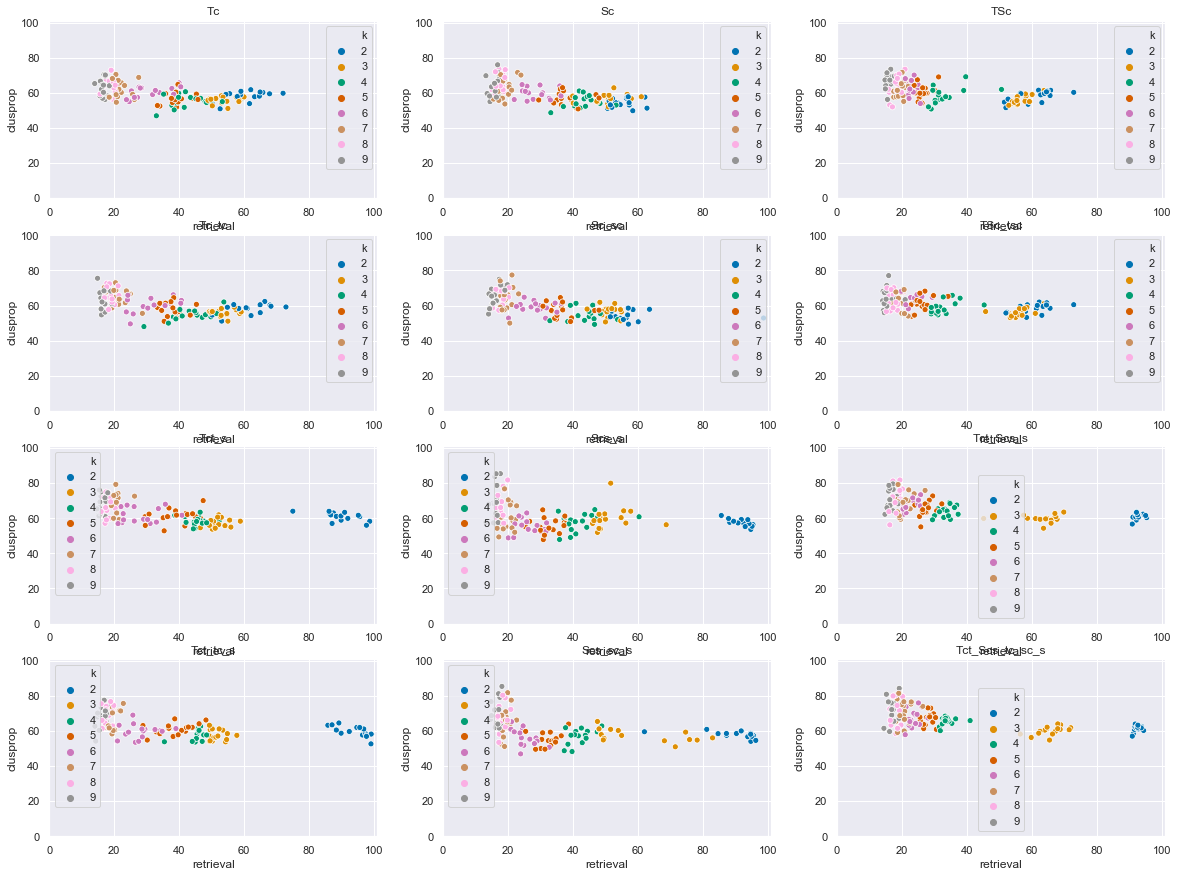

In [78]:
sns.set()
fig=plt.figure(figsize=[20,15])

for s in range(12):
    df=pd.DataFrame()
    for mf in range(4):
        for sf in range(4):
            filestr=(input_filedira + sets[s] + modstra + str((mf*4)+sf))
            with open(filestr, "rb") as f:
                mod = pickle.load(f)
            y=mod.cluster_ensembles_labels
            findHUNT=np.where(sampleidx[mod.train_index_sub]==2)[0]
            for k in range(8):
                cf=np.array([len(np.where(y[:,k]==i)[0]) for i in range(k+2)])

                hf=np.array([len(np.where(y[findHUNT,k]==i)[0]) for i in range(k+2)])
                huntfindmax[s,mf,sf,k]=(np.max(hf)*100)/len(findHUNT)
                huntclussize[s,mf,sf,k]=(np.max(hf)*100)/cf[np.where(hf==np.max(hf))[0][0]]
                
                tmp_df = pd.DataFrame({'retrieval': [huntfindmax[s,mf,sf,k]],
                                       'clusprop': [huntclussize[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)  
                
    plt.subplot(4,3,s+1)
    sns.scatterplot(x='retrieval', y='clusprop', hue='k', data=df, palette='colorblind')
    #sns.kdeplot(huntfindmax[s,:,:,7].flatten(), huntclussize[s,:,:,7].flatten())
    plt.xlim(0,101)
    plt.ylim(0,101)
    plt.title(sets[s])
plt.show()

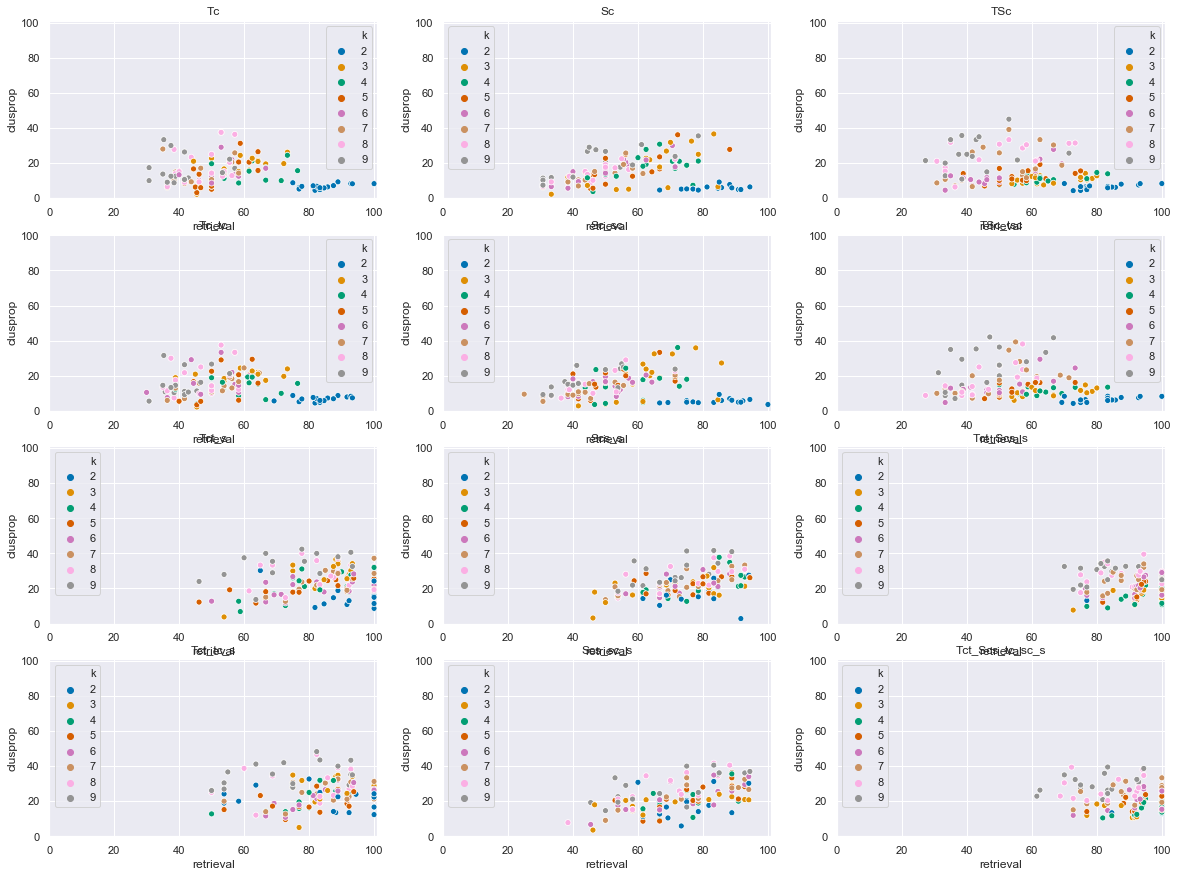

In [79]:
sns.set()
fig=plt.figure(figsize=[20,15])

for s in range(12):
    df=pd.DataFrame()
    for mf in range(4):
        for sf in range(4):
            filestr=(input_filedira + sets[s] + modstra + str((mf*4)+sf))
            with open(filestr, "rb") as f:
                mod = pickle.load(f)
            y=mod.cluster_ensembles_labels
            findHUNT=np.where(sampleidx[mod.train_index_sub]==4)[0]
            for k in range(8):
                cf=np.array([len(np.where(y[:,k]==i)[0]) for i in range(k+2)])

                hf=np.array([len(np.where(y[findHUNT,k]==i)[0]) for i in range(k+2)])
                huntfindmax[s,mf,sf,k]=(np.max(hf)*100)/len(findHUNT)
                huntclussize[s,mf,sf,k]=(np.max(hf)*100)/cf[np.where(hf==np.max(hf))[0][0]]
                
                tmp_df = pd.DataFrame({'retrieval': [huntfindmax[s,mf,sf,k]],
                                       'clusprop': [huntclussize[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)  
                
    plt.subplot(4,3,s+1)
    sns.scatterplot(x='retrieval', y='clusprop', hue='k', data=df, palette='colorblind')
    #sns.kdeplot(huntfindmax[s,:,:,7].flatten(), huntclussize[s,:,:,7].flatten())
    plt.xlim(0,101)
    plt.ylim(0,101)
    plt.title(sets[s])
plt.show()

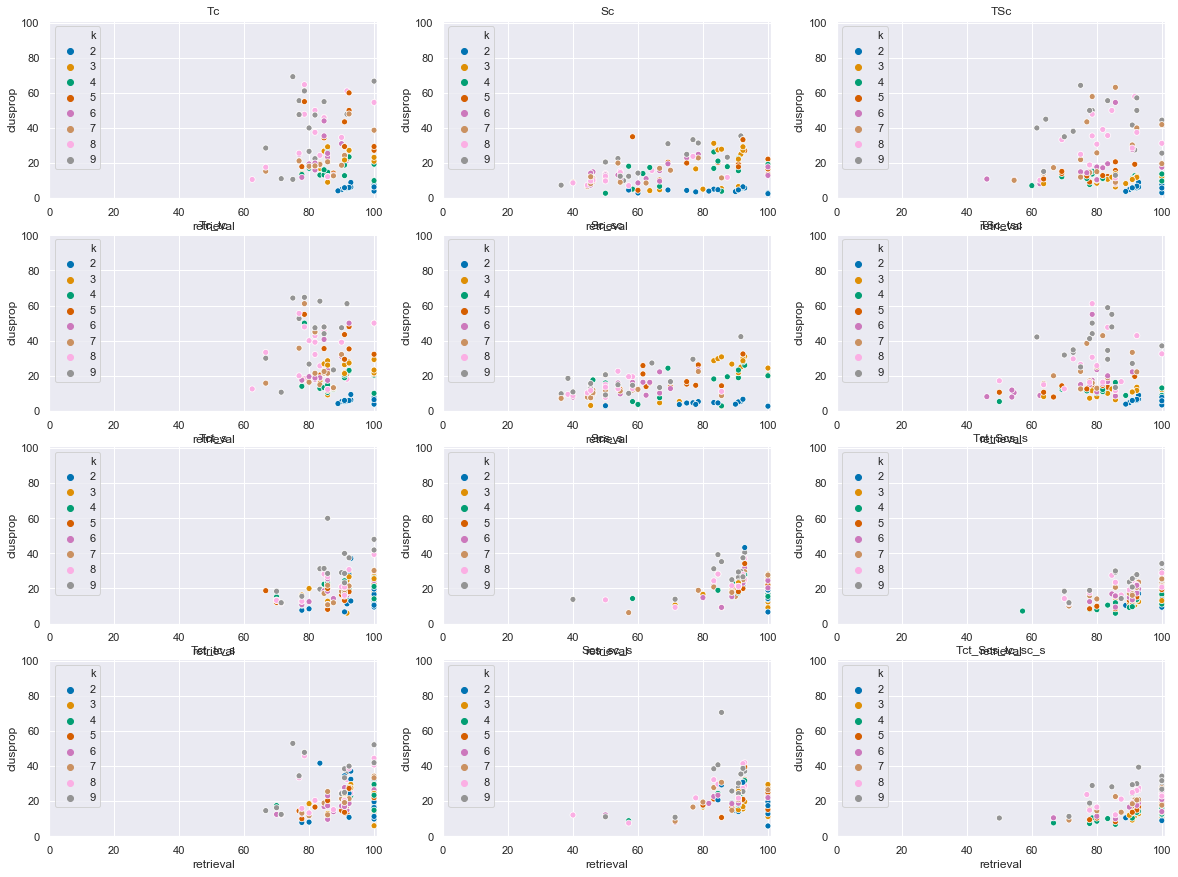

In [80]:
sns.set()
fig=plt.figure(figsize=[20,15])

for s in range(12):
    df=pd.DataFrame()
    for mf in range(4):
        for sf in range(4):
            filestr=(input_filedira + sets[s] + modstra + str((mf*4)+sf))
            with open(filestr, "rb") as f:
                mod = pickle.load(f)
            y=mod.cluster_ensembles_labels
            findHUNT=np.where(sampleidx[mod.train_index_sub]==5)[0]
            for k in range(8):
                cf=np.array([len(np.where(y[:,k]==i)[0]) for i in range(k+2)])

                hf=np.array([len(np.where(y[findHUNT,k]==i)[0]) for i in range(k+2)])
                huntfindmax[s,mf,sf,k]=(np.max(hf)*100)/len(findHUNT)
                huntclussize[s,mf,sf,k]=(np.max(hf)*100)/cf[np.where(hf==np.max(hf))[0][0]]
                
                tmp_df = pd.DataFrame({'retrieval': [huntfindmax[s,mf,sf,k]],
                                       'clusprop': [huntclussize[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)  
                
    plt.subplot(4,3,s+1)
    sns.scatterplot(x='retrieval', y='clusprop', hue='k', data=df, palette='colorblind')
    #sns.kdeplot(huntfindmax[s,:,:,7].flatten(), huntclussize[s,:,:,7].flatten())
    plt.xlim(0,101)
    plt.ylim(0,101)
    plt.title(sets[s])
plt.show()

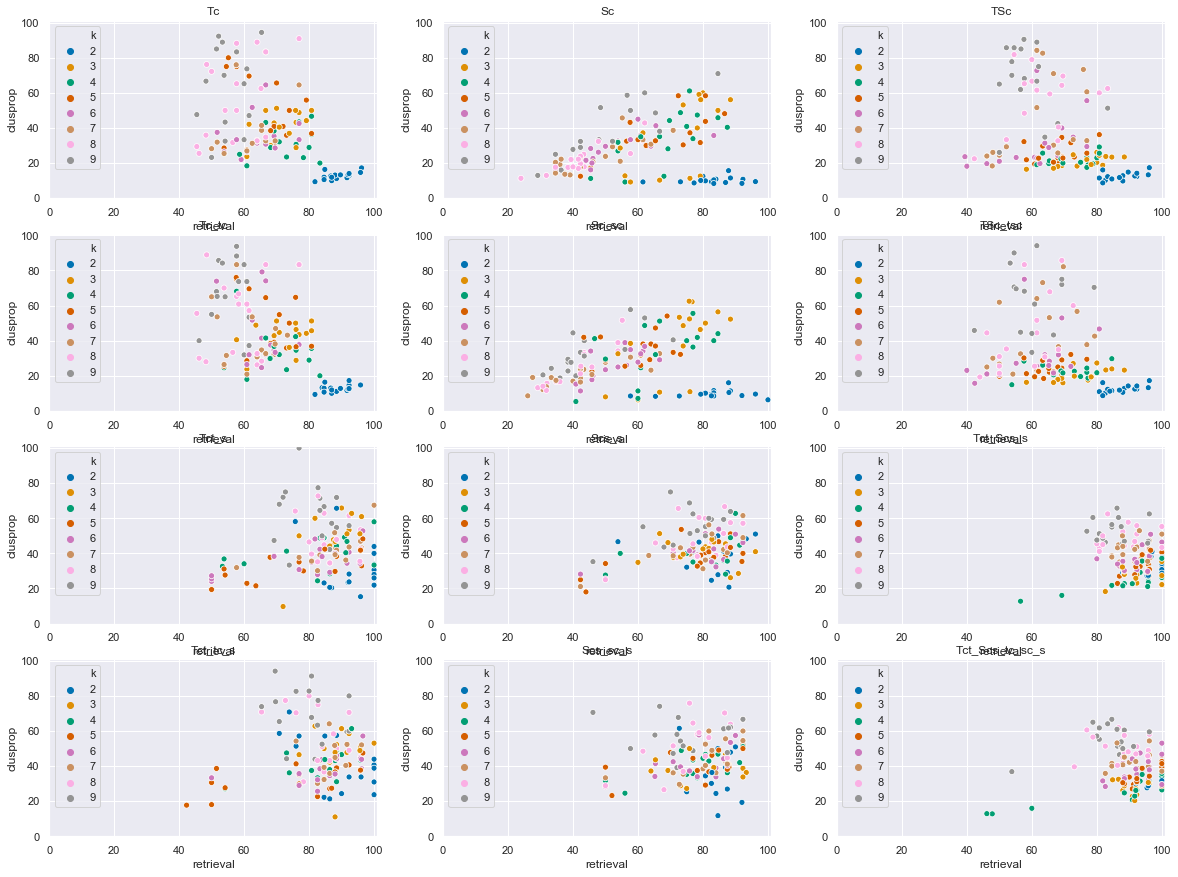

In [81]:
sns.set()
fig=plt.figure(figsize=[20,15])

for s in range(12):
    df=pd.DataFrame()
    for mf in range(4):
        for sf in range(4):
            filestr=(input_filedira + sets[s] + modstra + str((mf*4)+sf))
            with open(filestr, "rb") as f:
                mod = pickle.load(f)
            y=mod.cluster_ensembles_labels
            findHUNT=np.append(np.where(sampleidx[mod.train_index_sub]==4)[0],np.where(sampleidx[mod.train_index_sub]==5)[0])
            for k in range(8):
                cf=np.array([len(np.where(y[:,k]==i)[0]) for i in range(k+2)])

                hf=np.array([len(np.where(y[findHUNT,k]==i)[0]) for i in range(k+2)])
                huntfindmax[s,mf,sf,k]=(np.max(hf)*100)/len(findHUNT)
                huntclussize[s,mf,sf,k]=(np.max(hf)*100)/cf[np.where(hf==np.max(hf))[0][0]]
                
                tmp_df = pd.DataFrame({'retrieval': [huntfindmax[s,mf,sf,k]],
                                       'clusprop': [huntclussize[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)  
                
    plt.subplot(4,3,s+1)
    sns.scatterplot(x='retrieval', y='clusprop', hue='k', data=df, palette='colorblind')
    #sns.kdeplot(huntfindmax[s,:,:,7].flatten(), huntclussize[s,:,:,7].flatten())
    plt.xlim(0,101)
    plt.ylim(0,101)
    plt.title(sets[s])
plt.show()

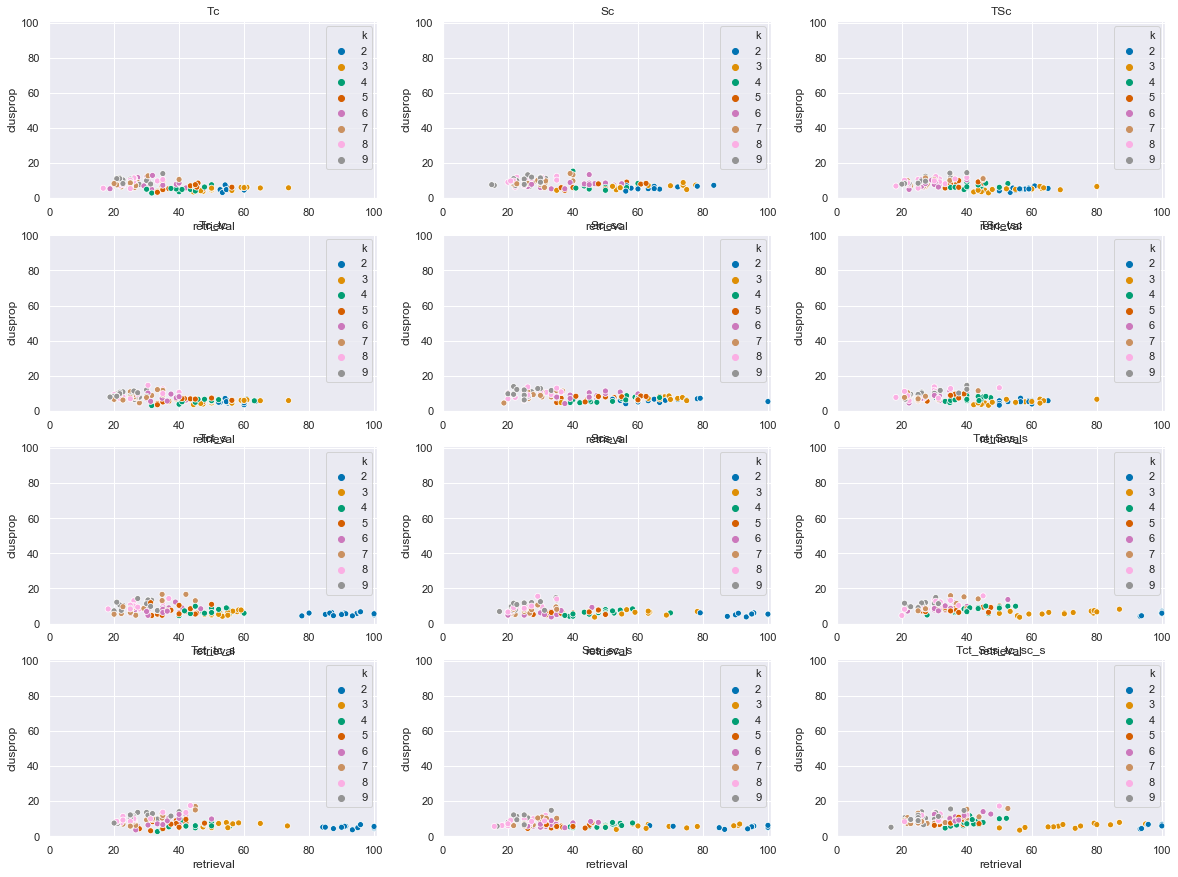

In [82]:
sns.set()
fig=plt.figure(figsize=[20,15])

for s in range(12):
    df=pd.DataFrame()
    for mf in range(4):
        for sf in range(4):
            filestr=(input_filedira + sets[s] + modstra + str((mf*4)+sf))
            with open(filestr, "rb") as f:
                mod = pickle.load(f)
            y=mod.cluster_ensembles_labels
            findHUNT=np.where(sampleidx[mod.train_index_sub]==6)[0]
            for k in range(8):
                cf=np.array([len(np.where(y[:,k]==i)[0]) for i in range(k+2)])

                hf=np.array([len(np.where(y[findHUNT,k]==i)[0]) for i in range(k+2)])
                huntfindmax[s,mf,sf,k]=(np.max(hf)*100)/len(findHUNT)
                huntclussize[s,mf,sf,k]=(np.max(hf)*100)/cf[np.where(hf==np.max(hf))[0][0]]
                
                tmp_df = pd.DataFrame({'retrieval': [huntfindmax[s,mf,sf,k]],
                                       'clusprop': [huntclussize[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)  
                
    plt.subplot(4,3,s+1)
    sns.scatterplot(x='retrieval', y='clusprop', hue='k', data=df, palette='colorblind')
    #sns.kdeplot(huntfindmax[s,:,:,7].flatten(), huntclussize[s,:,:,7].flatten())
    plt.xlim(0,101)
    plt.ylim(0,101)
    plt.title(sets[s])
plt.show()

In [83]:
[(len(np.where(sampleidx==i+1)[0])*100)/740 for i in range(6)]

[28.64864864864865,
 53.78378378378378,
 2.7027027027027026,
 3.5135135135135136,
 2.7027027027027026,
 4.864864864864865]

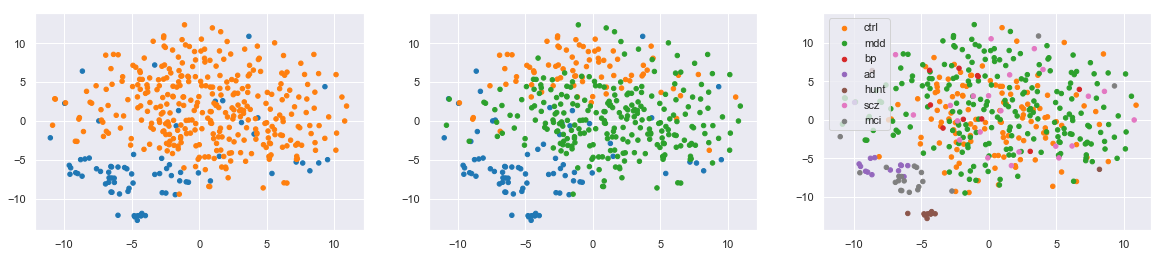

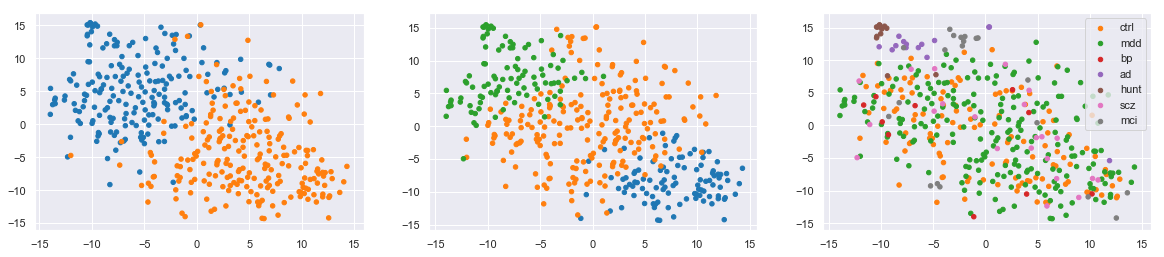

In [90]:
# plot the 2 and 3 cluster solutions for set 8
s=8
filestr=(input_filedira + sets[s] + modstra + str(0))
with open(filestr, "rb") as f:
    mod = pickle.load(f)

tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mod.data)

fig=plt.figure(figsize=[20,4])
ax=plt.subplot(1,3,1); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,0],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,2); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,1],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,3); colorscatter(tsne[mod.train_index_sub,:],sampleidx[mod.train_index_sub],np.ones(len(mod.train_index_sub))*4,ax,0)
plt.legend(['ctrl', 'mdd', 'bp', 'ad', 'hunt', 'scz', 'mci'])
plt.show()

s=2
filestr=(input_filedira + sets[s] + modstra + str(0))
with open(filestr, "rb") as f:
    mod = pickle.load(f)

tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mod.data)

fig=plt.figure(figsize=[20,4])
ax=plt.subplot(1,3,1); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,0],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,2); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,1],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,3); colorscatter(tsne[mod.train_index_sub,:],sampleidx[mod.train_index_sub],np.ones(len(mod.train_index_sub))*4,ax,0)
plt.legend(['ctrl', 'mdd', 'bp', 'ad', 'hunt', 'scz', 'mci'])
plt.show()

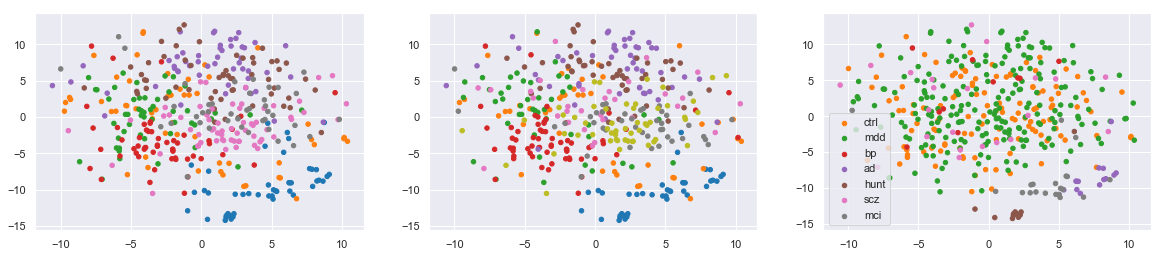

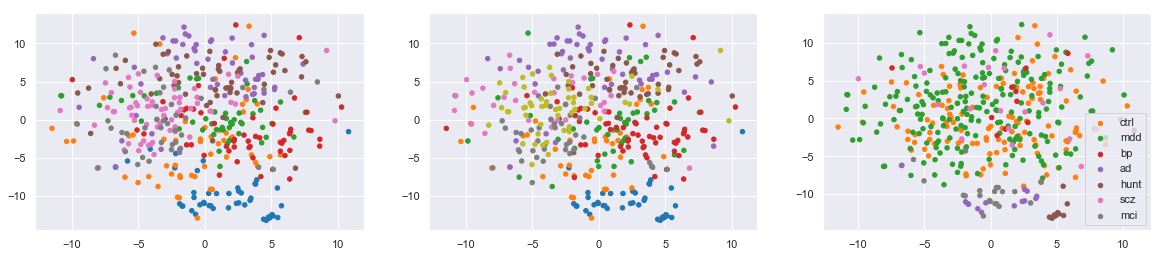

In [92]:
# plot the 8 and 9 cluster solutions for set 8
s=8
filestr=(input_filedira + sets[s] + modstra + str(0))
with open(filestr, "rb") as f:
    mod = pickle.load(f)

tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mod.data)

fig=plt.figure(figsize=[20,4])
ax=plt.subplot(1,3,1); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,6],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,2); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,7],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,3); colorscatter(tsne[mod.train_index_sub,:],sampleidx[mod.train_index_sub],np.ones(len(mod.train_index_sub))*4,ax,0)
plt.legend(['ctrl', 'mdd', 'bp', 'ad', 'hunt', 'scz', 'mci'])
plt.show()

s=8
filestr=(input_filedira + sets[s] + modstra + str(0))
with open(filestr, "rb") as f:
    mod = pickle.load(f)

tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mod.data)

fig=plt.figure(figsize=[20,4])
ax=plt.subplot(1,3,1); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,6],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,2); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,7],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,3); colorscatter(tsne[mod.train_index_sub,:],sampleidx[mod.train_index_sub],np.ones(len(mod.train_index_sub))*4,ax,0)
plt.legend(['ctrl', 'mdd', 'bp', 'ad', 'hunt', 'scz', 'mci'])
plt.show()

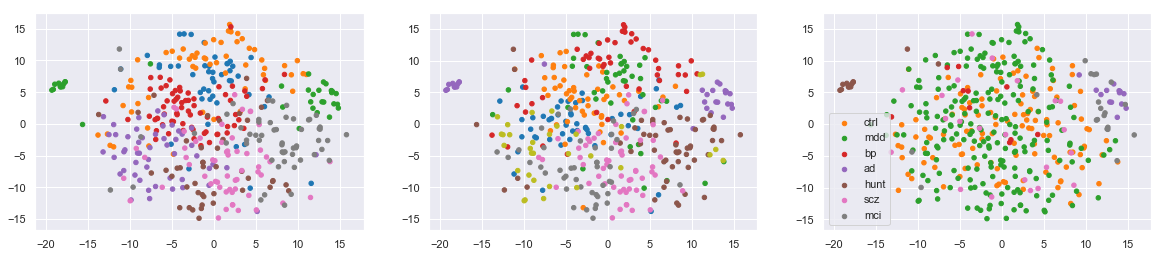

In [93]:
# plot the 9 cluster solutions for set 9
s=9
filestr=(input_filedira + sets[s] + modstra + str(0))
with open(filestr, "rb") as f:
    mod = pickle.load(f)

tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mod.data)

fig=plt.figure(figsize=[20,4])
ax=plt.subplot(1,3,1); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,6],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,2); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,7],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,3); colorscatter(tsne[mod.train_index_sub,:],sampleidx[mod.train_index_sub],np.ones(len(mod.train_index_sub))*4,ax,0)
plt.legend(['ctrl', 'mdd', 'bp', 'ad', 'hunt', 'scz', 'mci'])
plt.show()

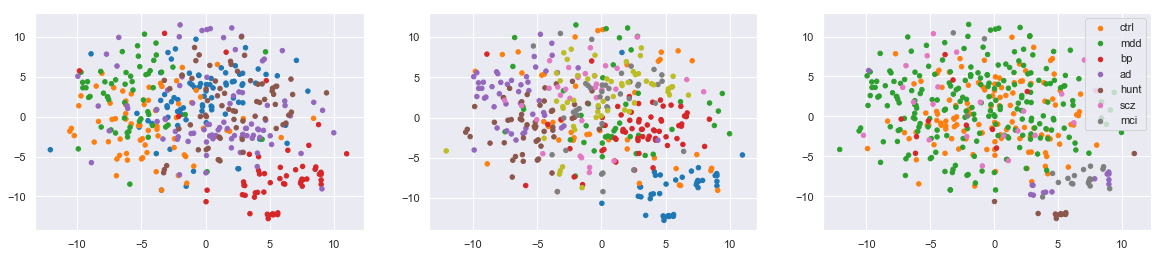

In [94]:
# plot the 9 cluster solutions for set 9
s=8
filestr=(input_filedira + sets[s] + modstra + str(0))
with open(filestr, "rb") as f:
    mod = pickle.load(f)

tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mod.data)

fig=plt.figure(figsize=[20,4])
ax=plt.subplot(1,3,1); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,4],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,2); colorscatter(tsne[mod.train_index_sub,:],mod.cluster_ensembles_labels[:,],np.ones(len(mod.train_index_sub))*4,ax,0)
ax=plt.subplot(1,3,3); colorscatter(tsne[mod.train_index_sub,:],sampleidx[mod.train_index_sub],np.ones(len(mod.train_index_sub))*4,ax,0)
plt.legend(['ctrl', 'mdd', 'bp', 'ad', 'hunt', 'scz', 'mci'])
plt.show()